In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/kaggle/input/ipl-dataset/IPL IMB381IPL2013.csv')
df

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,126,"Yadav, AS",2,IND,DC,Batsman,0,0,0,0.00,...,125.64,2,0,0,0.00,0.00,0.00,2010,50000,750000
126,127,Younis Khan,2,PAK,RR,Batsman,6398,7,6814,75.78,...,42.85,0,0,0,0.00,0.00,0.00,2008,225000,225000
127,128,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,...,131.88,67,569,23,24.74,7.02,21.13,2011,400000,1800000
128,129,Zaheer Khan,2,IND,MI+,Bowler,1114,288,790,73.55,...,91.67,1,1783,65,27.43,7.75,21.26,2008,200000,450000


In [4]:
df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [5]:
df.columns

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [6]:
df.shape

(130, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [12]:
df[120:131]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
120,121,"Vettori, DL",2,NZ,DD+,Allrounder,4486,359,2105,81.93,...,107.08,2,878,28,31.36,6.81,27.75,2008,250000,625000
121,122,"Vinay Kumar, R",2,IND,RCB+,Bowler,11,1,43,43.87,...,104.83,5,1664,61,27.28,8.24,19.87,2011,100000,475000
122,123,"Warne, SK",3,AUS,RR,Bowler,3154,708,1018,72.04,...,92.52,6,1447,57,25.39,7.27,20.95,2008,450000,450000
123,124,"Warner, DA",1,AUS,DD,Batsman,483,2,876,85.79,...,135.76,44,0,0,0.00,0.00,0.00,2011,200000,750000
124,125,"White, CL",2,AUS,RCB+,Batsman,146,5,2037,80.48,...,132.09,29,70,0,0.00,14.00,0.00,2008,100000,500000
125,126,"Yadav, AS",2,IND,DC,Batsman,0,0,0,0.00,...,125.64,2,0,0,0.00,0.00,0.00,2010,50000,750000
126,127,Younis Khan,2,PAK,RR,Batsman,6398,7,6814,75.78,...,42.85,0,0,0,0.00,0.00,0.00,2008,225000,225000
127,128,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,...,131.88,67,569,23,24.74,7.02,21.13,2011,400000,1800000
128,129,Zaheer Khan,2,IND,MI+,Bowler,1114,288,790,73.55,...,91.67,1,1783,65,27.43,7.75,21.26,2008,200000,450000
129,130,"Zoysa, DNT",2,SL,DC,Bowler,288,64,343,95.81,...,122.22,0,99,2,49.50,9.00,33.00,2008,100000,110000


In [10]:
df[-5:]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
125,126,"Yadav, AS",2,IND,DC,Batsman,0,0,0,0.00,...,125.64,2,0,0,0.00,0.00,0.00,2010,50000,750000
126,127,Younis Khan,2,PAK,RR,Batsman,6398,7,6814,75.78,...,42.85,0,0,0,0.00,0.00,0.00,2008,225000,225000
127,128,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,...,131.88,67,569,23,24.74,7.02,21.13,2011,400000,1800000
128,129,Zaheer Khan,2,IND,MI+,Bowler,1114,288,790,73.55,...,91.67,1,1783,65,27.43,7.75,21.26,2008,200000,450000
129,130,"Zoysa, DNT",2,SL,DC,Bowler,288,64,343,95.81,...,122.22,0,99,2,49.50,9.00,33.00,2008,100000,110000


In [11]:
df.head(5).transpose

<bound method DataFrame.transpose of    Sl.NO.   PLAYER NAME  AGE COUNTRY  TEAM PLAYING ROLE  T-RUNS  T-WKTS  \
0       1   Abdulla, YA    2      SA  KXIP   Allrounder       0       0   
1       2  Abdur Razzak    2     BAN   RCB       Bowler     214      18   
2       3   Agarkar, AB    2     IND   KKR       Bowler     571      58   
3       4     Ashwin, R    1     IND   CSK       Bowler     284      31   
4       5  Badrinath, S    2     IND   CSK      Batsman      63       0   

   ODI-RUNS-S  ODI-SR-B  ...    SR-B  SIXERS  RUNS-C  WKTS  AVE-BL   ECON  \
0           0      0.00  ...    0.00       0     307    15   20.47   8.90   
1         657     71.41  ...    0.00       0      29     0    0.00  14.50   
2        1269     80.62  ...  121.01       5    1059    29   36.52   8.81   
3         241     84.56  ...   76.32       0    1125    49   22.96   6.23   
4          79     45.93  ...  120.71      28       0     0    0.00   0.00   

   SR-BL  AUCTION YEAR  BASE PRICE  SOLD PRICE  


In [21]:
df.COUNTRY.value_counts()

COUNTRY
IND    53
AUS    22
SA     16
SL     12
PAK     9
NZ      7
WI      6
ENG     3
BAN     1
ZIM     1
Name: count, dtype: int64

In [22]:
df.COUNTRY.value_counts(normalize=True)*100

COUNTRY
IND    40.769231
AUS    16.923077
SA     12.307692
SL      9.230769
PAK     6.923077
NZ      5.384615
WI      4.615385
ENG     2.307692
BAN     0.769231
ZIM     0.769231
Name: proportion, dtype: float64

In [23]:
df[['PLAYER NAME','SOLD PRICE']].sort_values('SOLD PRICE')[:5]

,PLAYER NAME,SOLD PRICE
73,"Noffke, AA",20000
46,Kamran Khan,24000
0,"Abdulla, YA",50000
1,Abdur Razzak,50000
118,Van der Merwe,50000


In [24]:
df[['PLAYER NAME' , 'SOLD PRICE']].sort_values('SOLD PRICE', ascending =False)[:5]

,PLAYER NAME,SOLD PRICE
93,"Sehwag, V",1800000
127,Yuvraj Singh,1800000
50,"Kohli, V",1800000
111,"Tendulkar, SR",1800000
113,"Tiwary, SS",1600000


In [25]:
# grouping

df.groupby('AGE')['SOLD PRICE'].mean()

AGE
1    720250.000000
2    484534.883721
3    520178.571429
Name: SOLD PRICE, dtype: float64

In [26]:
df.groupby('AGE')['SOLD PRICE'].mean().reset_index()

,AGE,SOLD PRICE
0,1,720250.000000
1,2,484534.883721
2,3,520178.571429


In [30]:
merge_df = df.merge(df, on='AGE', how='outer')
print(merge_df.head(3))

   Sl.NO._x PLAYER NAME_x  AGE COUNTRY_x TEAM_x PLAYING ROLE_x  T-RUNS_x  \
0         4     Ashwin, R    1       IND    CSK         Bowler       284   
1         4     Ashwin, R    1       IND    CSK         Bowler       284   
2         4     Ashwin, R    1       IND    CSK         Bowler       284   

   T-WKTS_x  ODI-RUNS-S_x  ODI-SR-B_x  ...  SR-B_y  SIXERS_y  RUNS-C_y  \
0        31           241       84.56  ...   76.32         0      1125   
1        31           241       84.56  ...  113.09         9      1819   
2        31           241       84.56  ...  108.89         1       142   

   WKTS_y  AVE-BL_y  ECON_y  SR-BL_y  AUCTION YEAR_y  BASE PRICE_y  \
0      49     22.96    6.23    22.14            2011        100000   
1      73    126.30   38.11   100.20            2008        125000   
2       3     47.33    8.82    32.33            2011         50000   

   SOLD PRICE_y  
0        850000  
1        400000  
2         50000  

[3 rows x 51 columns]


In [31]:
df.columns.to_list()

['Sl.NO.',
 'PLAYER NAME',
 'AGE',
 'COUNTRY',
 'TEAM',
 'PLAYING ROLE',
 'T-RUNS',
 'T-WKTS',
 'ODI-RUNS-S',
 'ODI-SR-B',
 'ODI-WKTS',
 'ODI-SR-BL',
 'CAPTAINCY EXP',
 'RUNS-S',
 'HS',
 'AVE',
 'SR-B',
 'SIXERS',
 'RUNS-C',
 'WKTS',
 'AVE-BL',
 'ECON',
 'SR-BL',
 'AUCTION YEAR',
 'BASE PRICE',
 'SOLD PRICE']

In [35]:
# renaming the dataset
df.rename(columns = { 'BASE PRICE' : 'base_price',
                     'SOLD PRICE':'sold_price'}, inplace=True)

In [36]:
df.head(2)

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,base_price,sold_price
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.0,0,307,15,20.47,8.9,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.0,0,29,0,0.00,14.5,0.00,2008,50000,50000


In [45]:
print(df.columns.to_list())

['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE', 'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'base_price', 'sold_price']


In [50]:
df['premium'] = df['sold_price'] - df['base_price']

In [51]:
df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,base_price,sold_price,premium
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0,307,15,20.47,8.90,13.93,2009,50000,50000,0
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0,29,0,0.00,14.50,0.00,2008,50000,50000,0
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,5,1059,29,36.52,8.81,24.90,2008,200000,350000,150000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,0,1125,49,22.96,6.23,22.14,2011,100000,850000,750000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,28,0,0,0.00,0.00,0.00,2011,100000,800000,700000


In [54]:
ipl_auction_df = df

In [56]:
ipl_auction_df[['PLAYER NAME', 'base_price', 'sold_price', 'premium']][:5]

,PLAYER NAME,base_price,sold_price,premium
0,"Abdulla, YA",50000,50000,0
1,Abdur Razzak,50000,50000,0
2,"Agarkar, AB",200000,350000,150000
3,"Ashwin, R",100000,850000,750000
4,"Badrinath, S",100000,800000,700000


In [58]:
ipl_auction_df.columns.to_list()

['Sl.NO.',
 'PLAYER NAME',
 'AGE',
 'COUNTRY',
 'TEAM',
 'PLAYING ROLE',
 'T-RUNS',
 'T-WKTS',
 'ODI-RUNS-S',
 'ODI-SR-B',
 'ODI-WKTS',
 'ODI-SR-BL',
 'CAPTAINCY EXP',
 'RUNS-S',
 'HS',
 'AVE',
 'SR-B',
 'SIXERS',
 'RUNS-C',
 'WKTS',
 'AVE-BL',
 'ECON',
 'SR-BL',
 'AUCTION YEAR',
 'base_price',
 'sold_price',
 'premium']

In [59]:
influential_features = ['SR-BL',
 'AUCTION YEAR',
 'base_price',
 'sold_price',
 'premium']

In [60]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3

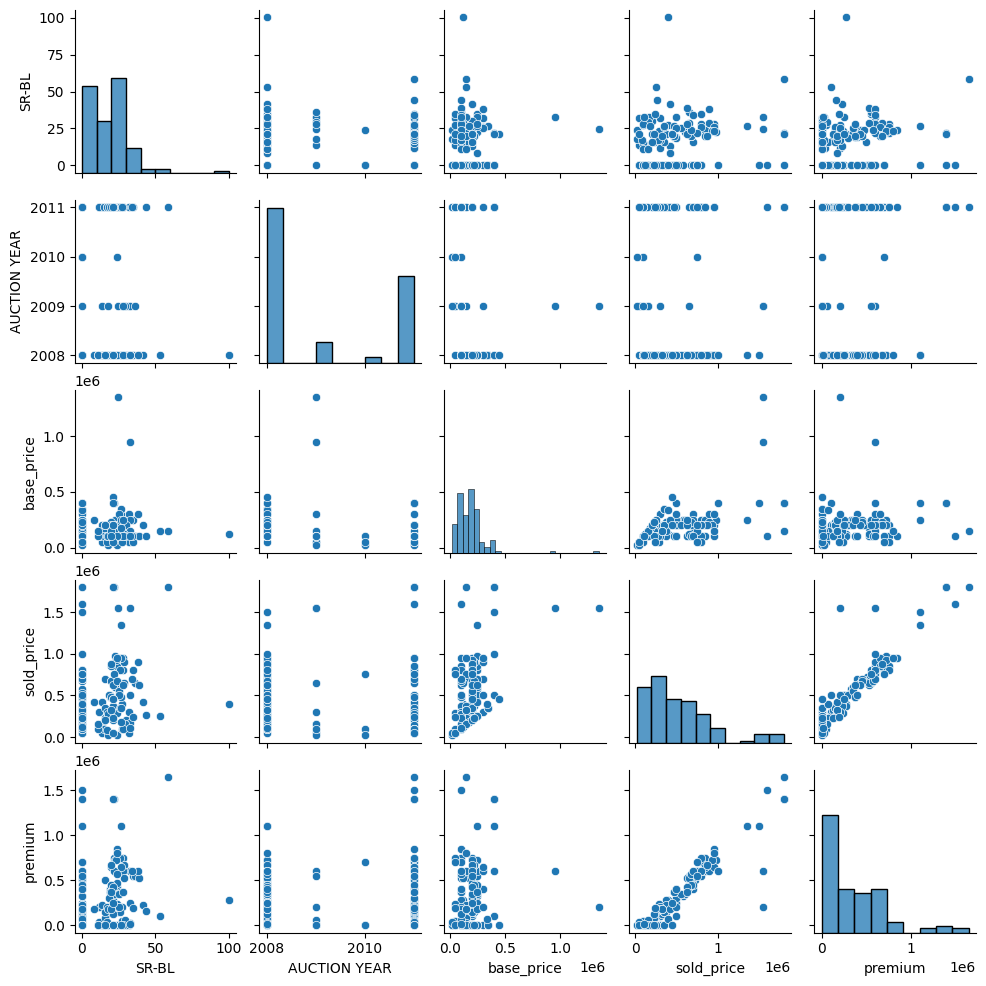

In [62]:
sns.pairplot(ipl_auction_df[influential_features], size=2)

In [63]:
ipl_auction_df[influential_features].corr()

,SR-BL,AUCTION YEAR,base_price,sold_price,premium
SR-BL,1.000000,0.089461,-0.001787,0.118296,0.137593
AUCTION YEAR,0.089461,1.000000,-0.166356,0.117700,0.208533
base_price,-0.001787,-0.166356,1.000000,0.523510,0.170212
sold_price,0.118296,0.117700,0.523510,1.000000,0.928694
premium,0.137593,0.208533,0.170212,0.928694,1.000000


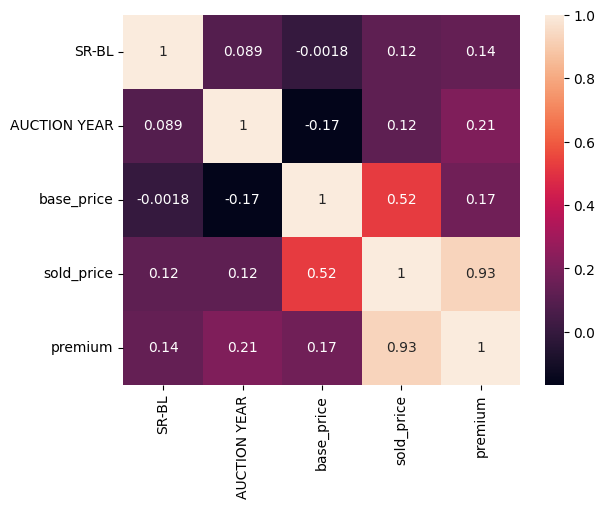

In [64]:
sns.heatmap(ipl_auction_df[influential_features].corr(), annot=True);

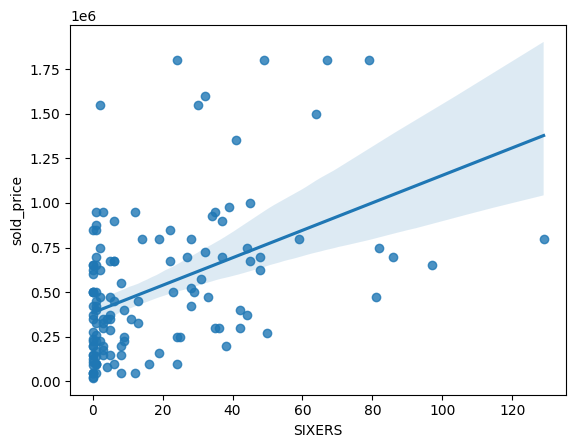

In [67]:
sns.regplot( x = 'SIXERS',
y = 'sold_price',
data = df );

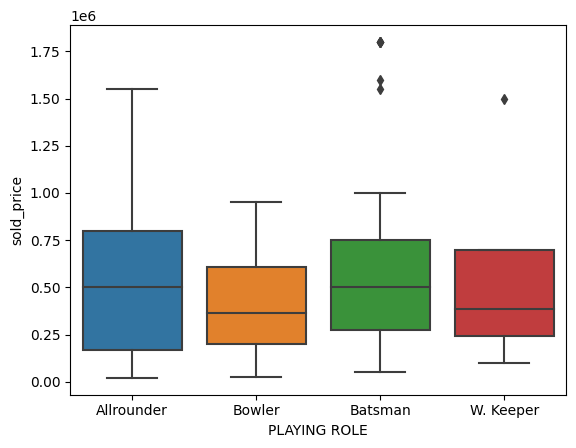

In [68]:
sns.boxplot(x = 'PLAYING ROLE', y = 'sold_price',
data = df);